In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
sns.set_theme()


In [7]:
df = pd.read_csv('../../Dataset/Temperature/GlobalLandTemperaturesByCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [8]:
import pandas as pd

# Supongamos que tus datos están en un DataFrame llamado df
df['dt'] = pd.to_datetime(df['dt'])
df = df[df['dt'].dt.year >= 1970]
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
2714,1970-01-01,-3.488,0.327,Århus,Denmark,57.05N,10.33E
2715,1970-02-01,-4.962,0.582,Århus,Denmark,57.05N,10.33E
2716,1970-03-01,0.361,0.367,Århus,Denmark,57.05N,10.33E
2717,1970-04-01,3.350,0.296,Århus,Denmark,57.05N,10.33E
2718,1970-05-01,11.343,0.311,Århus,Denmark,57.05N,10.33E


In [9]:
df.isna().sum()

dt                                  0
AverageTemperature               3070
AverageTemperatureUncertainty    3070
City                                0
Country                             0
Latitude                            0
Longitude                           0
dtype: int64

In [10]:
import pandas as pd
import numpy as np

def fill_nan_values(df):
    # Convertir la columna 'dt' a datetime
    df['dt'] = pd.to_datetime(df['dt'])
    
    # Crear una nueva columna para el mes
    df['Month'] = df['dt'].dt.month
    
    # Calcular la media de las temperaturas por ciudad, país y mes
    avg_temp = df.groupby(['City', 'Country', 'Month'])['AverageTemperature'].transform('mean')
    avg_temp_unc = df.groupby(['City', 'Country', 'Month'])['AverageTemperatureUncertainty'].transform('mean')
    
    # Reemplazar los valores NaN con las medias calculadas
    df['AverageTemperature'].fillna(avg_temp, inplace=True)
    df['AverageTemperatureUncertainty'].fillna(avg_temp_unc, inplace=True)
    
    return df


In [11]:
df = fill_nan_values(df)
df.isna().any()

dt                               False
AverageTemperature               False
AverageTemperatureUncertainty    False
City                             False
Country                          False
Latitude                         False
Longitude                        False
Month                            False
dtype: bool

In [12]:
def convert_coordinates(coord):
    direction = {'N':1, 'S':-1, 'E':1, 'W':-1}
    if isinstance(coord, str): # Comprueba si la coordenada es una cadena
        if coord[-1] in direction: 
            return direction[coord[-1]]*float(coord[:-1])
    return coord

In [13]:

df['Latitude'] = df['Latitude'].apply(convert_coordinates)
df['Longitude'] = df['Longitude'].apply(convert_coordinates)
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
2714,1970-01-01,-3.488,0.327,Århus,Denmark,57.05,10.33,1
2715,1970-02-01,-4.962,0.582,Århus,Denmark,57.05,10.33,2
2716,1970-03-01,0.361,0.367,Århus,Denmark,57.05,10.33,3
2717,1970-04-01,3.350,0.296,Århus,Denmark,57.05,10.33,4
2718,1970-05-01,11.343,0.311,Århus,Denmark,57.05,10.33,5


In [14]:
df.to_csv('WorldData.csv')

In [15]:
countries = df['Country'].unique()
print(countries)
len(countries)

['Denmark' 'Turkey' 'Kazakhstan' 'China' 'Spain' 'Germany' 'Nigeria'
 'Iran' 'Russia' 'Canada' "Côte D'Ivoire" 'United Kingdom' 'Saudi Arabia'
 'Japan' 'United States' 'India' 'Benin' 'United Arab Emirates' 'Mexico'
 'Venezuela' 'Ghana' 'Ethiopia' 'Australia' 'Yemen' 'Indonesia' 'Morocco'
 'Pakistan' 'France' 'Libya' 'Burma' 'Brazil' 'South Africa' 'Syria'
 'Egypt' 'Algeria' 'Netherlands' 'Malaysia' 'Portugal' 'Ecuador' 'Italy'
 'Uzbekistan' 'Philippines' 'Madagascar' 'Chile' 'Belgium' 'El Salvador'
 'Romania' 'Peru' 'Colombia' 'Tanzania' 'Tunisia' 'Turkmenistan' 'Israel'
 'Eritrea' 'Paraguay' 'Greece' 'New Zealand' 'Vietnam' 'Cameroon' 'Iraq'
 'Afghanistan' 'Argentina' 'Azerbaijan' 'Moldova' 'Mali'
 'Congo (Democratic Republic Of The)' 'Thailand'
 'Central African Republic' 'Bosnia And Herzegovina' 'Bangladesh'
 'Switzerland' 'Equatorial Guinea' 'Cuba' 'Lebanon' 'Mozambique' 'Serbia'
 'Angola' 'Somalia' 'Norway' 'Nepal' 'Poland' 'Ukraine' 'Guinea Bissau'
 'Malawi' 'Burkina Faso' 'Slov

159

In [16]:
cities = df['City'].unique()
print(cities)
len(cities)

['Århus' 'Çorlu' 'Çorum' ... 'Zurich' 'Zuwarah' 'Zwolle']


3448

In [17]:
# Lista de países a mantener
paises = ['United States', 'Canada', 'Mexico', 'Cuba', 'Russia', 'China', 
          'United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Netherlands', 
          'Belgium', 'Switzerland', 'Sweden', 'Norway', 'Denmark', 'Poland', 
          'Austria', 'Ireland', 'Portugal', 'Greece']

# Filtrar el dataframe
df = df[df['Country'].isin(paises)]


In [18]:
cities = df['City'].unique()
print(cities)
len(cities)

['Århus' 'Ürümqi' 'A Coruña' ... 'Zunyi' 'Zurich' 'Zwolle']


1283

In [19]:
# df['dt'] = pd.to_datetime(df['dt'])
# df.set_index('dt', inplace=True)
# df.head()

In [20]:
location_df = df[['City', 'Country', 'Latitude', 'Longitude']].drop_duplicates()
location_df.head()

,City,Country,Latitude,Longitude
2714,Århus,Denmark,57.05,10.33
13718,Ürümqi,China,44.20,87.20
16957,A Coruña,Spain,42.59,-8.73
20196,Aachen,Germany,50.63,6.34
23435,Aalborg,Denmark,57.05,10.33


In [21]:
city_df = df[['dt','AverageTemperature', 'City', 'Country']]
city_df.head()

,dt,AverageTemperature,City,Country
2714,1970-01-01,-3.488,Århus,Denmark
2715,1970-02-01,-4.962,Århus,Denmark
2716,1970-03-01,0.361,Århus,Denmark
2717,1970-04-01,3.350,Århus,Denmark
2718,1970-05-01,11.343,Århus,Denmark


In [22]:
city_df.tail()

,dt,AverageTemperature,City,Country
8599207,2013-05-01,11.46400,Zwolle,Netherlands
8599208,2013-06-01,15.04300,Zwolle,Netherlands
8599209,2013-07-01,18.77500,Zwolle,Netherlands
8599210,2013-08-01,18.02500,Zwolle,Netherlands
8599211,2013-09-01,14.50893,Zwolle,Netherlands


In [23]:
city_df = city_df.rename(columns={'dt': 'ds', 'AverageTemperature': 'y'})
city_df.head()

,ds,y,City,Country
2714,1970-01-01,-3.488,Århus,Denmark
2715,1970-02-01,-4.962,Århus,Denmark
2716,1970-03-01,0.361,Århus,Denmark
2717,1970-04-01,3.350,Århus,Denmark
2718,1970-05-01,11.343,Århus,Denmark


In [24]:
us_cities_df = city_df[city_df['Country'] == 'United States']

In [25]:
us_cities_df

,ds,y,City,Country
49355,1970-01-01,3.969,Abilene,United States
49356,1970-02-01,8.463,Abilene,United States
49357,1970-03-01,9.217,Abilene,United States
49358,1970-04-01,16.835,Abilene,United States
49359,1970-05-01,21.172,Abilene,United States
...,...,...,...,...
8439242,2013-05-01,15.544,Yonkers,United States
8439243,2013-06-01,20.892,Yonkers,United States
8439244,2013-07-01,24.722,Yonkers,United States
8439245,2013-08-01,21.001,Yonkers,United States


In [26]:
train_city= us_cities_df[us_cities_df['ds'].dt.year < 2010]
test_city = us_cities_df[us_cities_df['ds'].dt.year >= 2010]

In [27]:
# from prophet import Prophet
# from tqdm import tqdm

# # Crear un diccionario para almacenar los modelos
# models = {}

# # Iterar sobre cada ciudad única en el DataFrame
# for city in tqdm(us_cities_df['City'].drop_duplicates().values):
#     # Filtrar el DataFrame para esta ciudad
#     city_df = us_cities_df[us_cities_df['City'] == city]
    
 
#     # Ajustar el modelo Prophet
#     m = Prophet()
#     m.fit(city_df)
    
#     # Almacenar el modelo en el diccionario
#     models[city] = m



In [28]:
import joblib
from prophet import Prophet
from tqdm import tqdm

# Crear un diccionario para almacenar los modelos


# Función para entrenar y guardar los modelos de Prophet
def train_models(us_cities_df):
    models = {}
    for city in tqdm(us_cities_df['City'].drop_duplicates().values):
        city_df = us_cities_df[us_cities_df['City'] == city]
        m = Prophet()
        m.fit(city_df)
        models[city] = m
    return models

# Función para guardar los modelos en un archivo
def save_models(models, filename):
    joblib.dump(models, filename)

# Función para cargar los modelos desde un archivo
def load_models(filename):
    return joblib.load(filename)

In [29]:
# Entrenar y guardar los modelos
models = train_models(train_city)

  0%|          | 0/248 [00:00<?, ?it/s]

10:36:17 - cmdstanpy - INFO - Chain [1] start processing
10:36:30 - cmdstanpy - INFO - Chain [1] done processing
  0%|          | 1/248 [00:13<54:45, 13.30s/it]10:36:30 - cmdstanpy - INFO - Chain [1] start processing
10:36:30 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 2/248 [00:13<22:51,  5.58s/it]10:36:30 - cmdstanpy - INFO - Chain [1] start processing
10:36:30 - cmdstanpy - INFO - Chain [1] done processing
  1%|          | 3/248 [00:13<12:42,  3.11s/it]10:36:30 - cmdstanpy - INFO - Chain [1] start processing
10:36:30 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 4/248 [00:13<07:55,  1.95s/it]10:36:31 - cmdstanpy - INFO - Chain [1] start processing
10:36:31 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 5/248 [00:13<05:16,  1.30s/it]10:36:31 - cmdstanpy - INFO - Chain [1] start processing
10:36:31 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 6/248 [00:14<03:43,  1.08it/s]10:36:31 - cmdstanpy - INFO - Chain [1] 

In [30]:
# Guardar los modelos en un archivo
save_models(models, 'models.joblib')

In [31]:

# Cargar los modelos desde un archivo
loaded_models = load_models('models.joblib')

In [47]:
def predict_future(model, df, periods):
    future = df[['ds']]  # Solo usa las fechas en tu dataframe filtrado
    future = future.append(future.tail(1).assign(ds=lambda x: x.ds + pd.DateOffset(days=1)).tail(periods), ignore_index=True)
    forecast = model.predict(future)
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

def predict_long_future(model, df, start_year=2010, end_year=2018):
    # Crea un dataframe con todas las fechas desde start_year hasta end_year
    future_dates = pd.date_range(start=f'{start_year}-01-01', end=f'{end_year}-12-31')
    future = pd.DataFrame(future_dates, columns=['ds'])

    # Haz la predicción
    forecast = model.predict(future)
    
    return forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


def plot_comparison(df, predicciones, column, city):
    city_filter = df['City'] == city
    df = df[city_filter]
    print(df)
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df['ds'], df[column], label='Real')
    ax.plot(predicciones['ds'], predicciones['yhat'], label='Forecasting', color='green')
    ax.fill_between(predicciones['ds'], 
                    predicciones['yhat_lower'], 
                    predicciones['yhat_upper'], 
                    color='gray', alpha=0.3)

    ax.set_title(f'{city} Temperature Forecasting')
    ax.set_xlabel('Date')
    ax.set_ylabel('Temperature')
    ax.legend()
    plt.show()

In [48]:
city_model = models['New York']
test_city_df = test_city[test_city['City'] == 'New York']
forecast = predict_future(city_model, test_city_df, periods=30)

In [49]:
forecast[:2]

,ds,yhat,yhat_lower,yhat_upper
0,2010-01-01,-2.394780,-4.289018,-0.391449
1,2010-02-01,-0.816382,-2.969255,1.134557


In [50]:
test_city

,ds,y,City,Country
49835,2010-01-01,4.811,Abilene,United States
49836,2010-02-01,4.510,Abilene,United States
49837,2010-03-01,11.398,Abilene,United States
49838,2010-04-01,17.146,Abilene,United States
49839,2010-05-01,21.534,Abilene,United States
...,...,...,...,...
8439242,2013-05-01,15.544,Yonkers,United States
8439243,2013-06-01,20.892,Yonkers,United States
8439244,2013-07-01,24.722,Yonkers,United States
8439245,2013-08-01,21.001,Yonkers,United States


                ds       y      City        Country
5207167 2010-01-01  -2.359  New York  United States
5207168 2010-02-01  -1.456  New York  United States
5207169 2010-03-01   6.715  New York  United States
5207170 2010-04-01  12.076  New York  United States
5207171 2010-05-01  17.119  New York  United States
5207172 2010-06-01  21.943  New York  United States
5207173 2010-07-01  24.789  New York  United States
5207174 2010-08-01  22.670  New York  United States
5207175 2010-09-01  19.172  New York  United States
5207176 2010-10-01  11.911  New York  United States
5207177 2010-11-01   5.876  New York  United States
5207178 2010-12-01  -2.165  New York  United States
5207179 2011-01-01  -4.463  New York  United States
5207180 2011-02-01  -1.244  New York  United States
5207181 2011-03-01   3.474  New York  United States
5207182 2011-04-01  10.555  New York  United States
5207183 2011-05-01  16.917  New York  United States
5207184 2011-06-01  21.032  New York  United States
5207185 2011

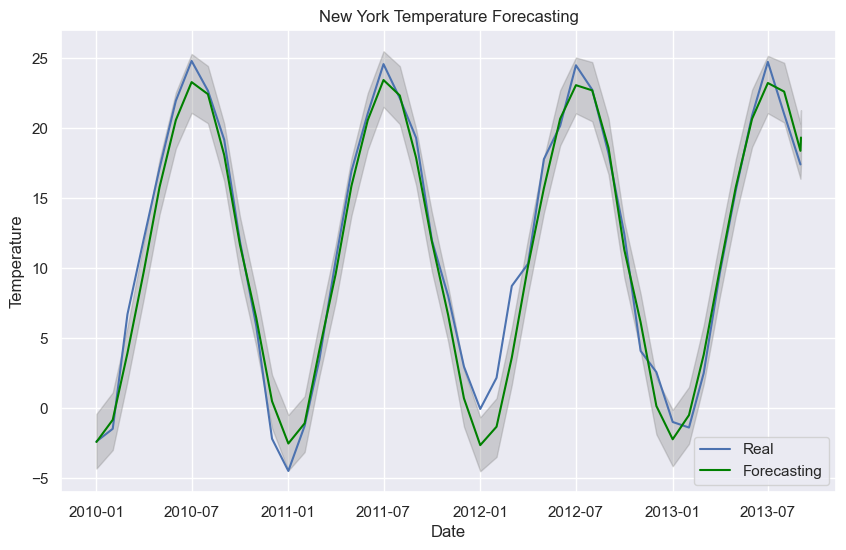

In [51]:
plot_comparison(test_city, forecast, 'y', 'New York')

In [52]:
from sklearn.metrics import mean_absolute_error

def calculate_mean_mae(models, test_city, periods=30):
    maes = []
    
    for city in models.keys():
        # Obtén el modelo y los datos de prueba para la ciudad dada
        city_model = models[city]
        test_city_df = test_city[test_city['City'] == city]
        
        # Haz la predicción
        forecast = predict_future(city_model, test_city_df[:-1], periods)

        # Calcula el MAE para esta ciudad
        mae = mean_absolute_error(test_city_df['y'], forecast['yhat'])
        maes.append(mae)
    
    # Calcula y devuelve el MAE promedio
    return sum(maes) / len(maes)


In [53]:
def calculate_mean_mse(models, test_city, periods=30):
    mses = []
    
    for city in models.keys():
        # Obtén el modelo y los datos de prueba para la ciudad dada
        city_model = models[city]
        test_city_df = test_city[test_city['City'] == city]
        
        # Haz la predicción
        forecast = predict_future(city_model, test_city_df[:-1], periods)

        # Calcula el MAE para esta ciudad
        mse = mean_squared_error(test_city_df['y'], forecast['yhat'])
        mses.append(mse)
    
    # Calcula y devuelve el MAE promedio
    return sum(mses) / len(mses)

### Multiple Cities Forecasting

In [54]:
def forecast_and_plot(city, models, test_city, periods=30):
    # Obtén el modelo y los datos de prueba para la ciudad dada
    city_model = models[city]
    test_city_df = test_city[test_city['City'] == city]

    # Haz la predicción
    forecast = predict_future(city_model, test_city_df, periods)

    # Visualiza los resultados
    plot_comparison(test_city, forecast, 'y', city)

    # Devuelve el pronóstico
    return forecast


In [55]:
main_cities = ['New York', 'Washington', 'Los Angeles', 'Las Vegas', 'Miami']

--- 

## **United States Cities Temperature Forecasting**

---

Mean Absolute Error Across All Forecasting Models: 1.534
Mean Squared Error Across All Forecasting Models: 7.311
                ds       y      City        Country
5207167 2010-01-01  -2.359  New York  United States
5207168 2010-02-01  -1.456  New York  United States
5207169 2010-03-01   6.715  New York  United States
5207170 2010-04-01  12.076  New York  United States
5207171 2010-05-01  17.119  New York  United States
5207172 2010-06-01  21.943  New York  United States
5207173 2010-07-01  24.789  New York  United States
5207174 2010-08-01  22.670  New York  United States
5207175 2010-09-01  19.172  New York  United States
5207176 2010-10-01  11.911  New York  United States
5207177 2010-11-01   5.876  New York  United States
5207178 2010-12-01  -2.165  New York  United States
5207179 2011-01-01  -4.463  New York  United States
5207180 2011-02-01  -1.244  New York  United States
5207181 2011-03-01   3.474  New York  United States
5207182 2011-04-01  10.555  New York  United States
520

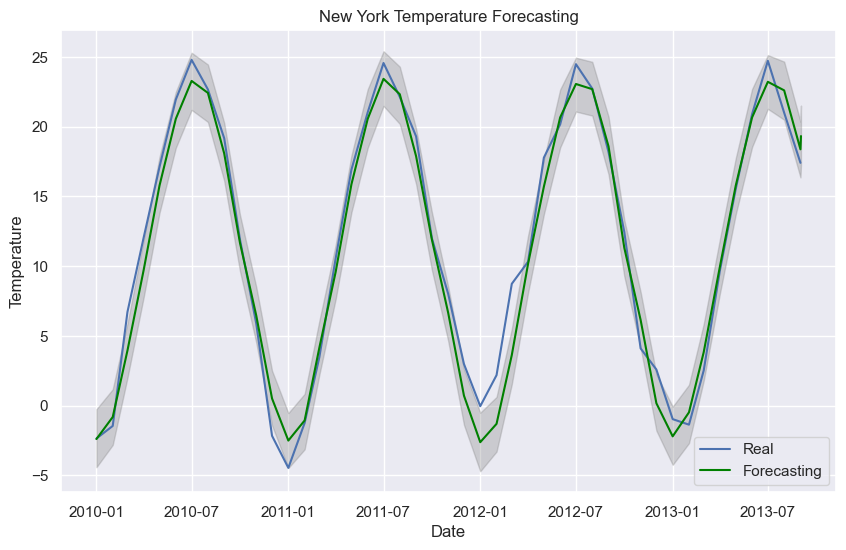

                ds       y        City        Country
8165093 2010-01-01  -0.191  Washington  United States
8165094 2010-02-01  -0.721  Washington  United States
8165095 2010-03-01   8.816  Washington  United States
8165096 2010-04-01  14.208  Washington  United States
8165097 2010-05-01  18.928  Washington  United States
8165098 2010-06-01  24.801  Washington  United States
8165099 2010-07-01  26.520  Washington  United States
8165100 2010-08-01  24.852  Washington  United States
8165101 2010-09-01  21.403  Washington  United States
8165102 2010-10-01  13.977  Washington  United States
8165103 2010-11-01   7.518  Washington  United States
8165104 2010-12-01  -0.741  Washington  United States
8165105 2011-01-01  -1.709  Washington  United States
8165106 2011-02-01   2.528  Washington  United States
8165107 2011-03-01   6.452  Washington  United States
8165108 2011-04-01  13.627  Washington  United States
8165109 2011-05-01  19.117  Washington  United States
8165110 2011-06-01  23.731  

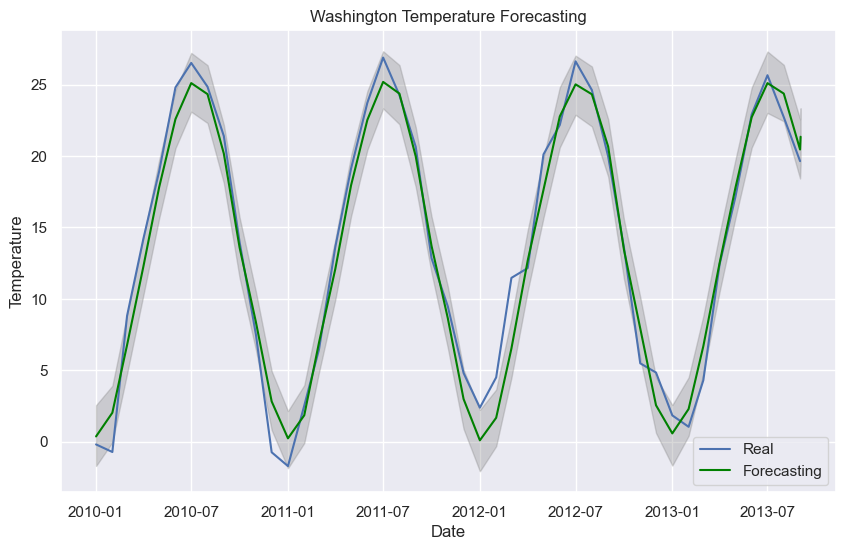

                ds       y         City        Country
4358680 2010-01-01  10.090  Los Angeles  United States
4358681 2010-02-01  10.353  Los Angeles  United States
4358682 2010-03-01  12.437  Los Angeles  United States
4358683 2010-04-01  12.283  Los Angeles  United States
4358684 2010-05-01  15.895  Los Angeles  United States
4358685 2010-06-01  20.724  Los Angeles  United States
4358686 2010-07-01  23.636  Los Angeles  United States
4358687 2010-08-01  23.545  Los Angeles  United States
4358688 2010-09-01  22.420  Los Angeles  United States
4358689 2010-10-01  16.910  Los Angeles  United States
4358690 2010-11-01  12.114  Los Angeles  United States
4358691 2010-12-01  10.237  Los Angeles  United States
4358692 2011-01-01  10.432  Los Angeles  United States
4358693 2011-02-01   8.759  Los Angeles  United States
4358694 2011-03-01  11.985  Los Angeles  United States
4358695 2011-04-01  14.217  Los Angeles  United States
4358696 2011-05-01  15.729  Los Angeles  United States
4358697 20

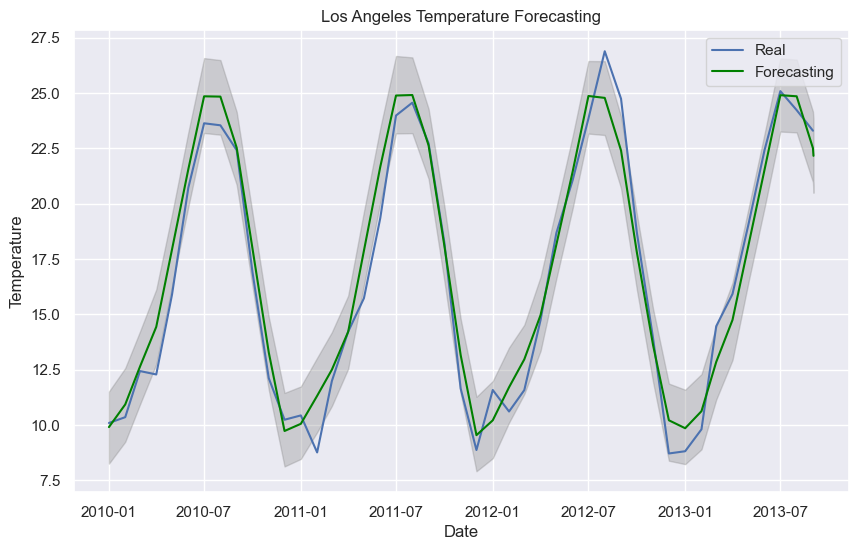

                ds       y       City        Country
4158937 2010-01-01   6.690  Las Vegas  United States
4158938 2010-02-01   8.547  Las Vegas  United States
4158939 2010-03-01  11.626  Las Vegas  United States
4158940 2010-04-01  14.377  Las Vegas  United States
4158941 2010-05-01  18.696  Las Vegas  United States
4158942 2010-06-01  27.362  Las Vegas  United States
4158943 2010-07-01  32.119  Las Vegas  United States
4158944 2010-08-01  29.373  Las Vegas  United States
4158945 2010-09-01  26.184  Las Vegas  United States
4158946 2010-10-01  18.264  Las Vegas  United States
4158947 2010-11-01  10.458  Las Vegas  United States
4158948 2010-12-01   8.099  Las Vegas  United States
4158949 2011-01-01   6.966  Las Vegas  United States
4158950 2011-02-01   7.336  Las Vegas  United States
4158951 2011-03-01  12.622  Las Vegas  United States
4158952 2011-04-01  15.853  Las Vegas  United States
4158953 2011-05-01  18.853  Las Vegas  United States
4158954 2011-06-01  26.096  Las Vegas  United 

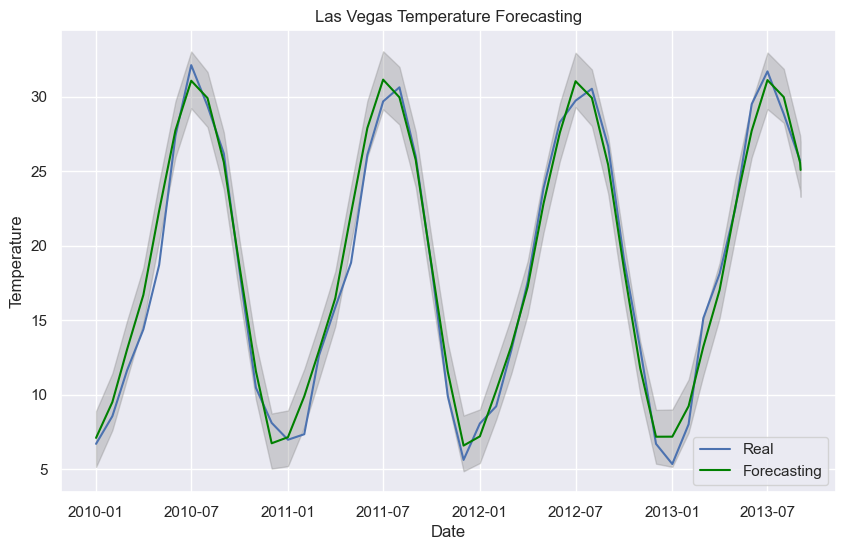

                ds       y   City        Country
4805290 2010-01-01  14.773  Miami  United States
4805291 2010-02-01  15.479  Miami  United States
4805292 2010-03-01  17.578  Miami  United States
4805293 2010-04-01  22.778  Miami  United States
4805294 2010-05-01  26.882  Miami  United States
4805295 2010-06-01  29.336  Miami  United States
4805296 2010-07-01  29.344  Miami  United States
4805297 2010-08-01  29.211  Miami  United States
4805298 2010-09-01  28.261  Miami  United States
4805299 2010-10-01  24.575  Miami  United States
4805300 2010-11-01  21.348  Miami  United States
4805301 2010-12-01  13.450  Miami  United States
4805302 2011-01-01  17.004  Miami  United States
4805303 2011-02-01  20.078  Miami  United States
4805304 2011-03-01  21.497  Miami  United States
4805305 2011-04-01  25.176  Miami  United States
4805306 2011-05-01  26.103  Miami  United States
4805307 2011-06-01  27.944  Miami  United States
4805308 2011-07-01  28.826  Miami  United States
4805309 2011-08-01  

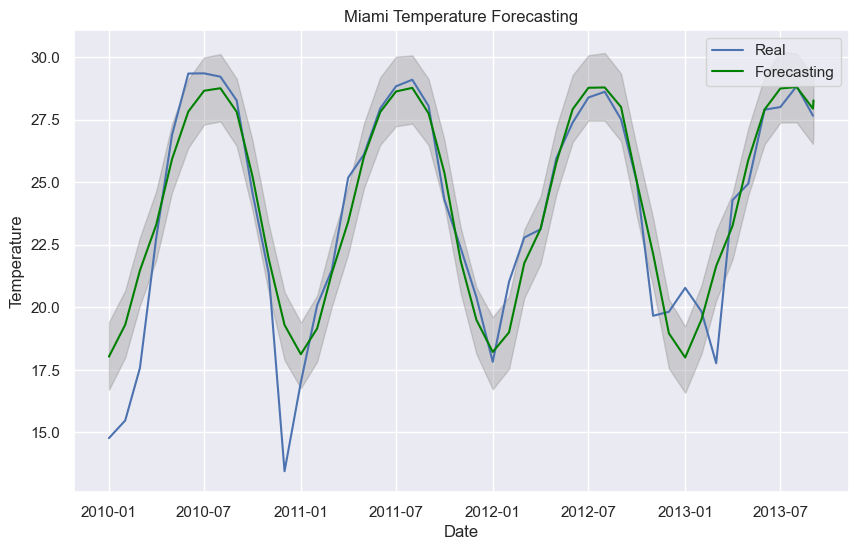

In [56]:
mae = calculate_mean_mae(models, test_city)
print(f'Mean Absolute Error Across All Forecasting Models: {round(mae,3)}') 
mse = calculate_mean_mse(models, test_city)
print(f'Mean Squared Error Across All Forecasting Models: {round(mse,3)}') 
for city in main_cities:
    forecast = forecast_and_plot(city, models, test_city)